In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
from torch import optim

numpy = lambda x : x.detach().cpu().numpy().squeeze()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import pyrtools as pt
import plenoptic as po

%load_ext autoreload
%autoreload 2

In [96]:
# Preprocessing
# np_img1 = plt.imread('../data/curie.pgm').astype('float')
np_img1 = plt.imread('../data/einstein.png').astype('float')[:,:,0]
# np_img1 = plt.imread('../data/cat7-elephant1.png').astype('float')

# normalize values between 0-1
np_img1 = po.rescale(np_img1)

# if len(np_img1.shape) == 2:                  # if no channel dimension exists
#     np_img1 = np.expand_dims(np_img1, axis=-1)
# np_img1 = np.transpose(np_img1, (2, 0, 1))   # adjust dimensions for pytorch
# np_img1 = np.expand_dims(np_img1, axis=0)    # add batch dimension
# np_img1 = np_img1 / 255.0                    # normalize values between 0-1
# np_img1 = np_img1.astype(np.float32)         # adjust type

# img1 = torch.from_numpy(np_img1)
img1 = torch.tensor(np_img1, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)
img2 = torch.rand_like(img1).to(device)

img1.requires_grad = False
img2.requires_grad = True

In [97]:
# loss_func = po.synth.ssim
# loss_func = po.synth.msssim
# loss_func = po.synth.nlpd
loss_func = po.synth.nspd

value = loss_func(img1, img2)
print("Initial distance: %.5f" % (value.item()))

Initial distance: 0.33173


In [98]:
optimizer = optim.Adam([img2], lr=0.01)

# MSSSIM yields higher values for worse results,
# because noise is removed in scales with lower resolutions

threshold = 0.999
#if metric == 'MSSSIM' else 0.9

I = []
# while value < threshold:
for i in range(200):
    optimizer.zero_grad()
    loss = -loss_func(img1, img2)
    value = -loss.item()
    print('Current distance = %.5f' % value)
    loss.backward()
    optimizer.step()
    
    I.append(numpy(img2).copy())

Current distance = 0.33173
Current distance = 0.35436
Current distance = 0.38004
Current distance = 0.40867
Current distance = 0.43919
Current distance = 0.46859
Current distance = 0.49297
Current distance = 0.51310
Current distance = 0.53280
Current distance = 0.55429
Current distance = 0.57811
Current distance = 0.60387
Current distance = 0.63057
Current distance = 0.65690
Current distance = 0.68158
Current distance = 0.70400
Current distance = 0.72476
Current distance = 0.74551
Current distance = 0.76786
Current distance = 0.79254
Current distance = 0.81897
Current distance = 0.84502
Current distance = 0.86793
Current distance = 0.88806
Current distance = 0.90894
Current distance = 0.93299
Current distance = 0.95939
Current distance = 0.98498
Current distance = 1.00982
Current distance = 1.03560
Current distance = 1.05900
Current distance = 1.07766
Current distance = 1.09802
Current distance = 1.12388
Current distance = 1.14932
Current distance = 1.17177
Current distance = 1.19830
C

In [99]:
def post_process(img):
    img = img.detach().cpu().numpy()
    img = np.transpose(np.squeeze(img, axis=0), (1, 2, 0))
    img = np.squeeze(img)     # works if grayscale
    return img

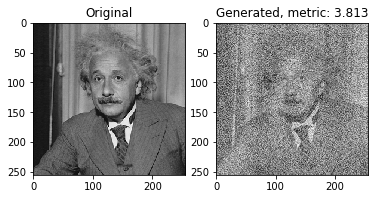

In [100]:
# Post processing
img1np = post_process(img1)
img2 = torch.sigmoid(img2)
img2np = post_process(img2)
import matplotlib.pyplot as plt
cmap = 'gray' if len(img1np.shape) == 2 else None
plt.subplot(1, 2, 1)
plt.imshow(img1np, cmap=cmap)
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(img2np, cmap=cmap)
plt.title('Generated, metric: {:.3f}'.format(value))
plt.show()

In [101]:
pt.animshow(np.array(I), 10)

Difference statistics:
  Range: [0, 0]
  Mean: -0.195655,  Stdev (rmse): 0.124418,  SNR (dB): 2.365561


(-0.5204361, 0.27630788, -0.19565533, 0.12441837560525788, 2.3655612078802273)

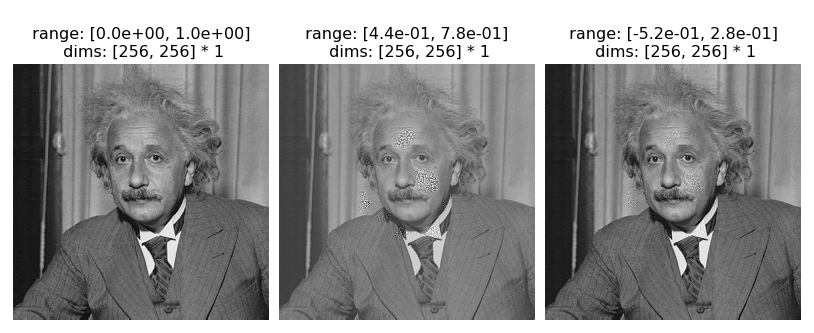

In [92]:
pt.imshow([numpy(img1), numpy(img2), numpy(img1) - numpy(img2)]);
pt.image_compare(numpy(img1), numpy(img2))

In [93]:
pt.animshow(np.array(I), 10)